<a href="https://colab.research.google.com/github/Ghanifhakbar/-TUBES-Aplikasi-Pendaftaran-Mahasiswa/blob/main/ghanif_py_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

In [33]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import numpy as np

from pandas.plotting import scatter_matrix

path = kagglehub.dataset_download("aerodinamicc/earthquakes-in-japan")

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]


if csv_files:
    # Baca file CSV pertama
    csv_file_path = os.path.join(path, csv_files[0])
    data1 = pd.read_csv(csv_file_path)

    # Tampilkan 10 baris pertama
    print(data1.head(10))

                       time  latitude  longitude   depth  mag magType  nst  \
0  2018-11-27T14:34:20.900Z   48.3780   154.9620   35.00  4.9      mb  NaN   
1  2018-11-26T23:33:50.630Z   36.0733   139.7830   48.82  4.8     mww  NaN   
2  2018-11-26T13:04:02.250Z   38.8576   141.8384   50.56  4.5      mb  NaN   
3  2018-11-26T05:20:16.440Z   50.0727   156.1420   66.34  4.6      mb  NaN   
4  2018-11-25T09:19:05.010Z   33.9500   134.4942   38.19  4.6      mb  NaN   
5  2018-11-25T03:16:46.320Z   48.4158   155.0325   35.00  4.6      mb  NaN   
6  2018-11-23T14:30:14.510Z   37.1821   141.1721   46.76  5.2      mb  NaN   
7  2018-11-23T07:19:51.110Z   29.3424   142.3121   10.00  4.7      mb  NaN   
8  2018-11-20T20:16:02.790Z   44.4524   148.0753  101.46  4.7     mww  NaN   
9  2018-11-20T19:09:48.760Z   30.4087   130.0687  123.00  5.5     mww  NaN   

     gap   dmin   rms  ...                   updated  \
0   92.0  5.044  0.63  ...  2018-11-27T16:06:33.040Z   
1  113.0  1.359  1.13  ...  2

# Take a Quick Look at the Data Structure

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             14092 non-null  object 
 1   latitude         14092 non-null  float64
 2   longitude        14092 non-null  float64
 3   depth            14092 non-null  float64
 4   mag              14092 non-null  float64
 5   magType          14092 non-null  object 
 6   nst              10483 non-null  float64
 7   gap              13310 non-null  float64
 8   dmin             3607 non-null   float64
 9   rms              14014 non-null  float64
 10  net              14092 non-null  object 
 11  id               14092 non-null  object 
 12  updated          14092 non-null  object 
 13  place            14092 non-null  object 
 14  type             14092 non-null  object 
 15  horizontalError  2800 non-null   float64
 16  depthError       9040 non-null   float64
 17  magError    

In [44]:
data1["place"].value_counts()

,count
place,
"off the east coast of Honshu, Japan",2344
"near the east coast of Honshu, Japan",2141
Kuril Islands,1789
"Bonin Islands, Japan region",858
"Izu Islands, Japan region",617
...,...
"1km N of Koshigaya, Japan",1
"4km W of Sakura, Japan",1
"55km SE of Katsuura, Japan",1


In [4]:
data1.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,14092.000000,14092.000000,14092.000000,14092.000000,10483.000000,13310.000000,3607.000000,14014.000000,2800.000000,9040.000000,3431.000000,11048.000000
mean,37.410294,142.980441,51.364838,4.817045,117.352094,104.272149,2.359796,0.876561,7.288607,7.822920,0.095182,48.590695
std,6.605873,6.552510,76.603810,0.378618,123.273889,37.893474,1.658681,0.203787,2.263028,5.861948,0.060710,70.233727
min,23.532900,124.293000,0.000000,4.500000,5.000000,8.000000,0.038000,0.120000,1.400000,0.000000,0.019000,1.000000
25%,33.147675,141.071000,14.400000,4.600000,36.000000,78.000000,1.109000,0.740000,5.800000,4.400000,0.054000,9.000000
50%,37.357000,142.452100,35.000000,4.700000,69.000000,112.700000,1.979000,0.850000,7.100000,6.200000,0.079000,23.000000
75%,42.271325,144.432000,50.372500,4.900000,153.000000,130.900000,3.122500,0.990000,8.500000,9.600000,0.118000,57.000000
max,50.816100,158.818000,683.360000,9.100000,929.000000,306.600000,18.781000,1.880000,25.600000,70.700000,0.555000,941.000000


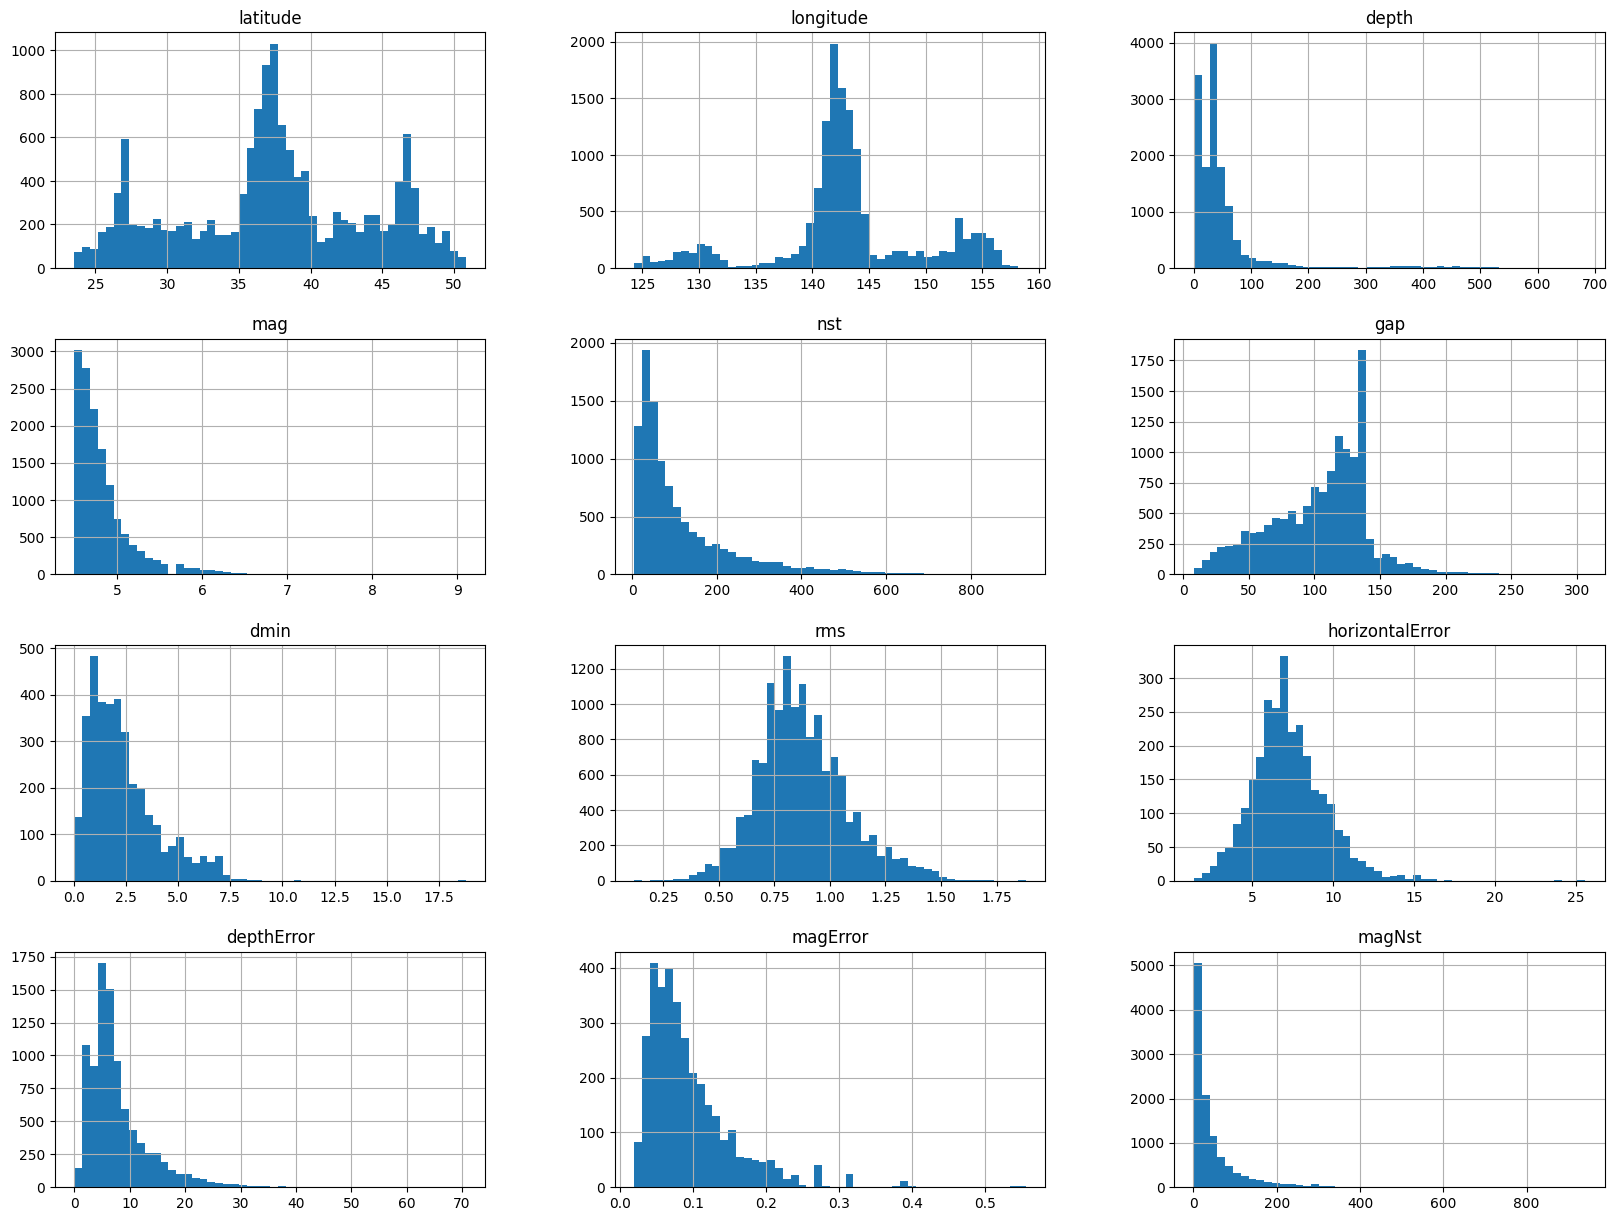

In [6]:

data1.hist(bins=50, figsize=(20,15))
plt.show()

# Discover and Visualize the Data to Gain Insights

<Axes: xlabel='latitude', ylabel='longitude'>

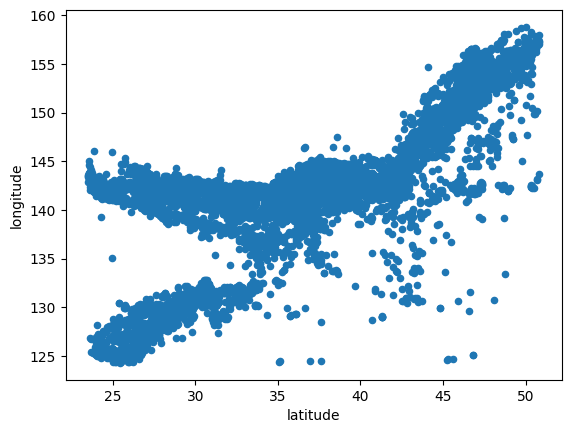

In [36]:
data1.plot(kind="scatter", x="latitude", y="longitude")

<Axes: xlabel='latitude', ylabel='longitude'>

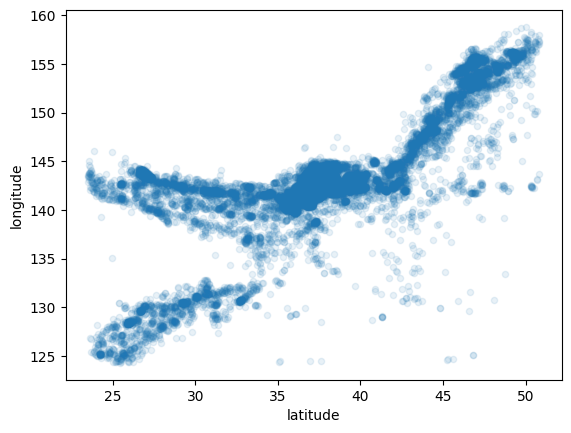

In [8]:
data1.plot(kind="scatter", x="latitude", y="longitude", alpha=0.1)

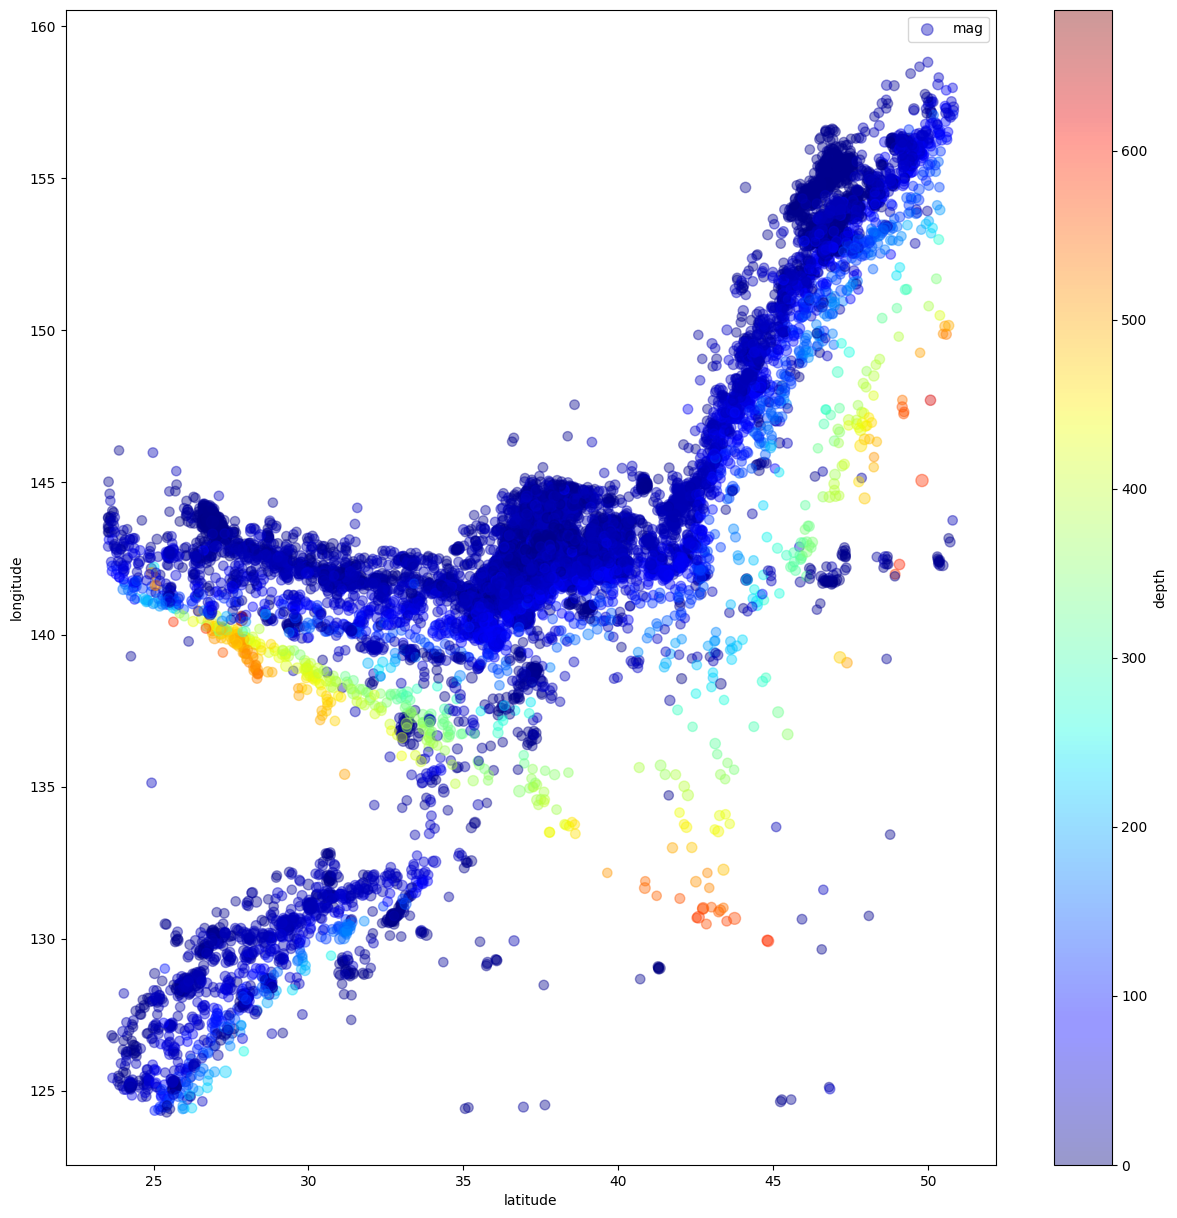

In [35]:
data1.plot(kind="scatter", x="latitude", y="longitude", alpha=0.4,
             s=data1["mag"]*10, label="mag", figsize=(15,15),
             c="depth", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

Visualisasi scatter plot ini menunjukkan distribusi spasial data, dengan ukuran titik menunjukkan magnitudo dan warna menunjukkan kedalaman. Melalui plot ini, kita dapat mengamati hubungan antara lokasi geografis, magnitudo, dan kedalaman, mengidentifikasi kluster dan outlier, serta menemukan pola spasial seperti area rawan gempa atau variasi kedalaman di lokasi berbeda. Informasi ini dapat memberikan wawasan berharga untuk memahami fenomena yang diwakili oleh data.


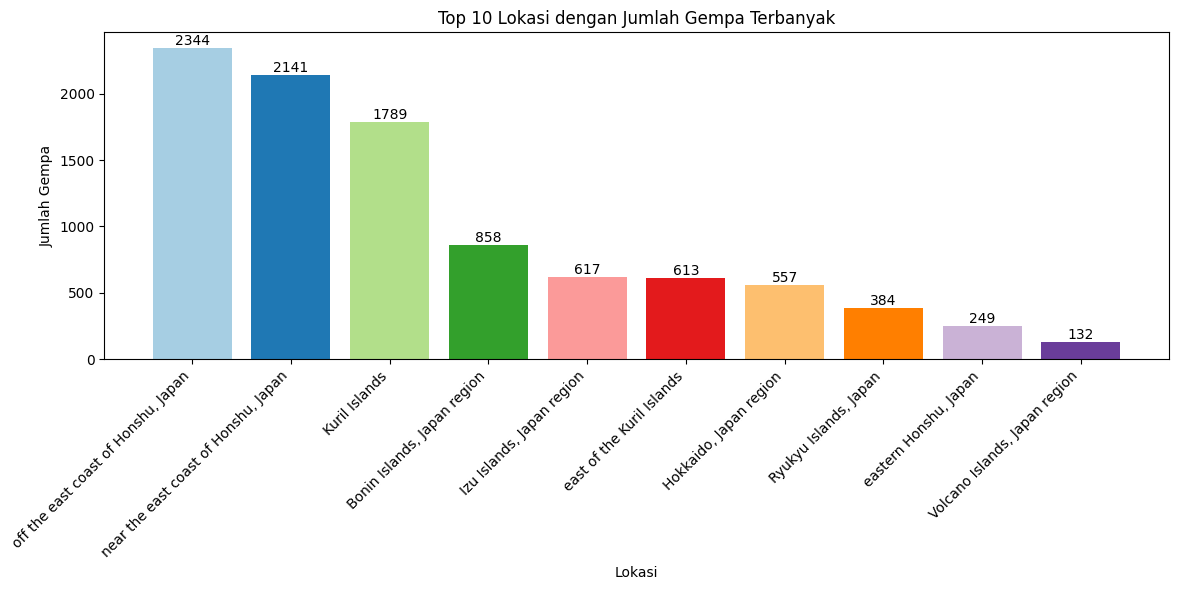

In [62]:
hitung_tempat = data1['place'].value_counts()

top_10_places = hitung_tempat.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_places.index, top_10_places.values, color=plt.cm.Paired.colors)

plt.xlabel('Lokasi')
plt.ylabel('Jumlah Gempa')
plt.title('Top 10 Lokasi dengan Jumlah Gempa Terbanyak')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Visualisasi ini memberikan gambaran yang jelas tentang daerah mana yang paling sering mengalami gempa, yang dapat membantu dalam analisis risiko dan perencanaan mitigasi. Dengan informasi ini, kita dapat mengambil tindakan yang lebih baik untuk melindungi masyarakat dan infrastruktur di daerah yang berisiko tinggi.



# Looking for Correlations

In [26]:
corr_matrix = data1.select_dtypes(include=['number']).corr()

In [27]:
corr_matrix["mag"].sort_values(ascending=False)

,mag
mag,1.000000
nst,0.790998
magNst,0.426230
depth,0.057030
latitude,0.056480
longitude,-0.009355
rms,-0.019253
dmin,-0.028698
depthError,-0.165991
horizontalError,-0.166875


array([[<Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='mag', ylabel='latitude'>,
        <Axes: xlabel='depth', ylabel='latitude'>],
       [<Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='mag', ylabel='longitude'>,
        <Axes: xlabel='depth', ylabel='longitude'>],
       [<Axes: xlabel='latitude', ylabel='mag'>,
        <Axes: xlabel='longitude', ylabel='mag'>,
        <Axes: xlabel='mag', ylabel='mag'>,
        <Axes: xlabel='depth', ylabel='mag'>],
       [<Axes: xlabel='latitude', ylabel='depth'>,
        <Axes: xlabel='longitude', ylabel='depth'>,
        <Axes: xlabel='mag', ylabel='depth'>,
        <Axes: xlabel='depth', ylabel='depth'>]], dtype=object)

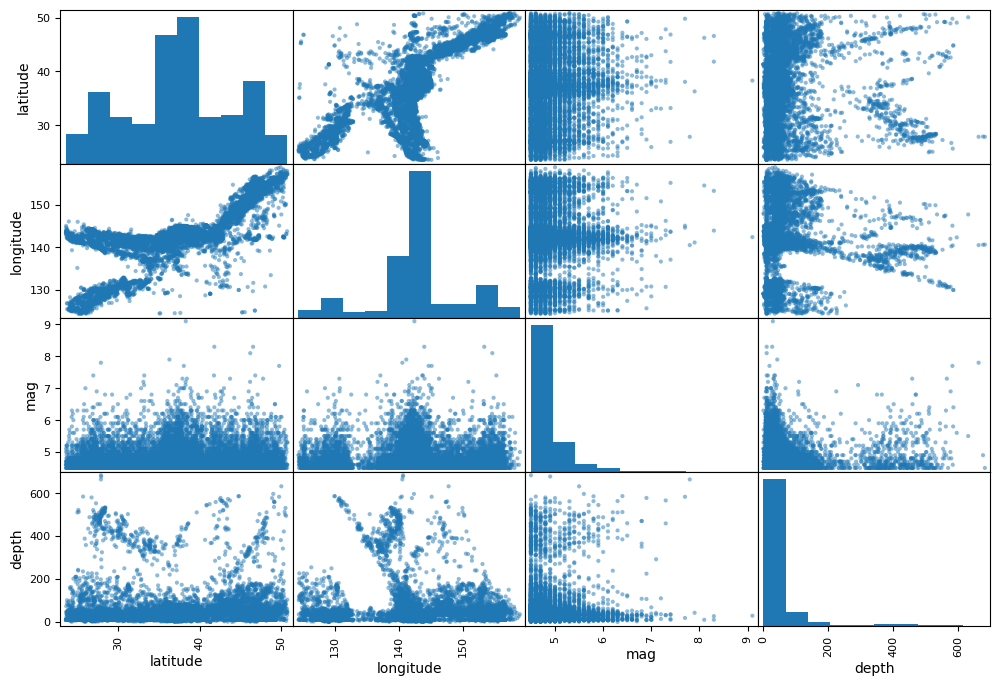

In [31]:


attributes = ["latitude", "longitude", "mag","depth"]
scatter_matrix(data1[attributes], figsize=(12, 8))